# Problem Statement

Within the context of human resources (HR), attrition is a reduction in the workforce caused by retirement or resignation. This is a serious problem faced by several organizations around the world as attrition is economically damaging to the organizations as the replacement employees have to be hired at a cost and trained again at a cost. High Rates of Attrition also damages the brand value of the company.
 
Now the Dataset belongs to a very fast-growing company. This company has witnessed several employees leaving the company in the last 3 years. The company’s HR team has always been reactive to attrition but now the team wants to be proactive and wished to predict attrition of employees using the data they have in hand. 


# Goal

The goal here is to predict whether an employee will leave the company based upon the various variables given in the dataset.


# Importing and Reading the Data

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,roc_curve,roc_auc_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [2]:
attrition_data=pd.read_csv('Attrition.csv')
pd.set_option('display.max_columns',None)
attrition_data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [3]:
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Checking for the null values in the dataset

In [4]:
attrition_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
attrition_data['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [6]:
attrition_data['EmployeeNumber'].value_counts()

1       1
1391    1
1389    1
1387    1
1383    1
       ..
659     1
657     1
656     1
655     1
2068    1
Name: EmployeeNumber, Length: 1470, dtype: int64

In [7]:
attrition_data.shape

(1470, 35)

In [8]:
attrition_data=attrition_data.drop(columns=['Over18','EmployeeCount','StandardHours'])

Dropping the columns Over18 , EmployeeCount , StandardHours from the dataset as they are constants and have only single values which makes them less significant in Feature Engineering and Model Building

Basic Statistical Description of Attrition Data

In [9]:
attrition_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Basic Exploratory Data Analysis

<Axes: ylabel='Attrition'>

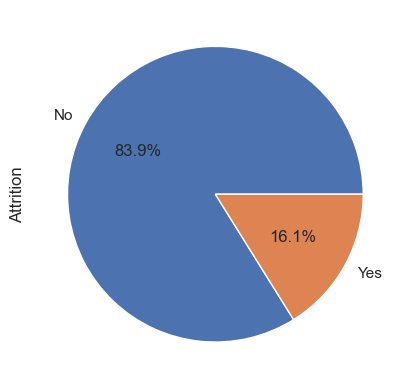

In [10]:
attrition_data['Attrition'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Overall Data has an attrition rate of 16.1% i.e. 16.1% of the employees are ready to leave the company in search of opportunities

In [11]:
attrition_data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSince

# Feature Engineering

In [12]:
attrition_data['Total_Satisfaction']=(attrition_data['EnvironmentSatisfaction']+ 
                                     attrition_data['JobInvolvement']+
                                     attrition_data['JobSatisfaction']+
                                     attrition_data['RelationshipSatisfaction']+
                                     attrition_data['WorkLifeBalance'])/5

In [13]:
attrition_data=attrition_data.drop(columns=['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance'])

In [14]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,Gender,HourlyRate,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Total_Satisfaction
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,Female,94,2,Sales Executive,Single,5993,19479,8,Yes,11,3,0,8,0,6,4,0,5,2.2
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,Male,61,2,Research Scientist,Married,5130,24907,1,No,23,4,1,10,3,10,7,1,7,2.8
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,1,Laboratory Technician,Single,2090,2396,6,Yes,15,3,0,7,3,0,0,0,0,2.8
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,Female,56,1,Research Scientist,Married,2909,23159,1,Yes,11,3,0,8,3,8,7,3,0,3.2
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,Male,40,1,Laboratory Technician,Married,3468,16632,9,No,12,3,1,6,3,2,2,2,2,2.6


In [15]:
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1470 non-null   int64  
 1   Attrition                1470 non-null   object 
 2   BusinessTravel           1470 non-null   object 
 3   DailyRate                1470 non-null   int64  
 4   Department               1470 non-null   object 
 5   DistanceFromHome         1470 non-null   int64  
 6   Education                1470 non-null   int64  
 7   EducationField           1470 non-null   object 
 8   EmployeeNumber           1470 non-null   int64  
 9   Gender                   1470 non-null   object 
 10  HourlyRate               1470 non-null   int64  
 11  JobLevel                 1470 non-null   int64  
 12  JobRole                  1470 non-null   object 
 13  MaritalStatus            1470 non-null   object 
 14  MonthlyIncome           

In [16]:
discrete_features=[]
categorical_features=[]
non_categorical_features=[]
def classify_features(data):
    for col in attrition_data:
        if attrition_data[col].dtype in ['int64','float64']:
            if len(attrition_data[col].value_counts())>10:
                non_categorical_features.append(col)
            else:
                discrete_features.append(col)
        if attrition_data[col].dtype=='object':
            categorical_features.append(col)

In [17]:
classify_features(attrition_data)

In [18]:
categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [19]:
discrete_features

['Education',
 'JobLevel',
 'NumCompaniesWorked',
 'PerformanceRating',
 'StockOptionLevel',
 'TrainingTimesLastYear']

In [20]:
non_categorical_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Total_Satisfaction']

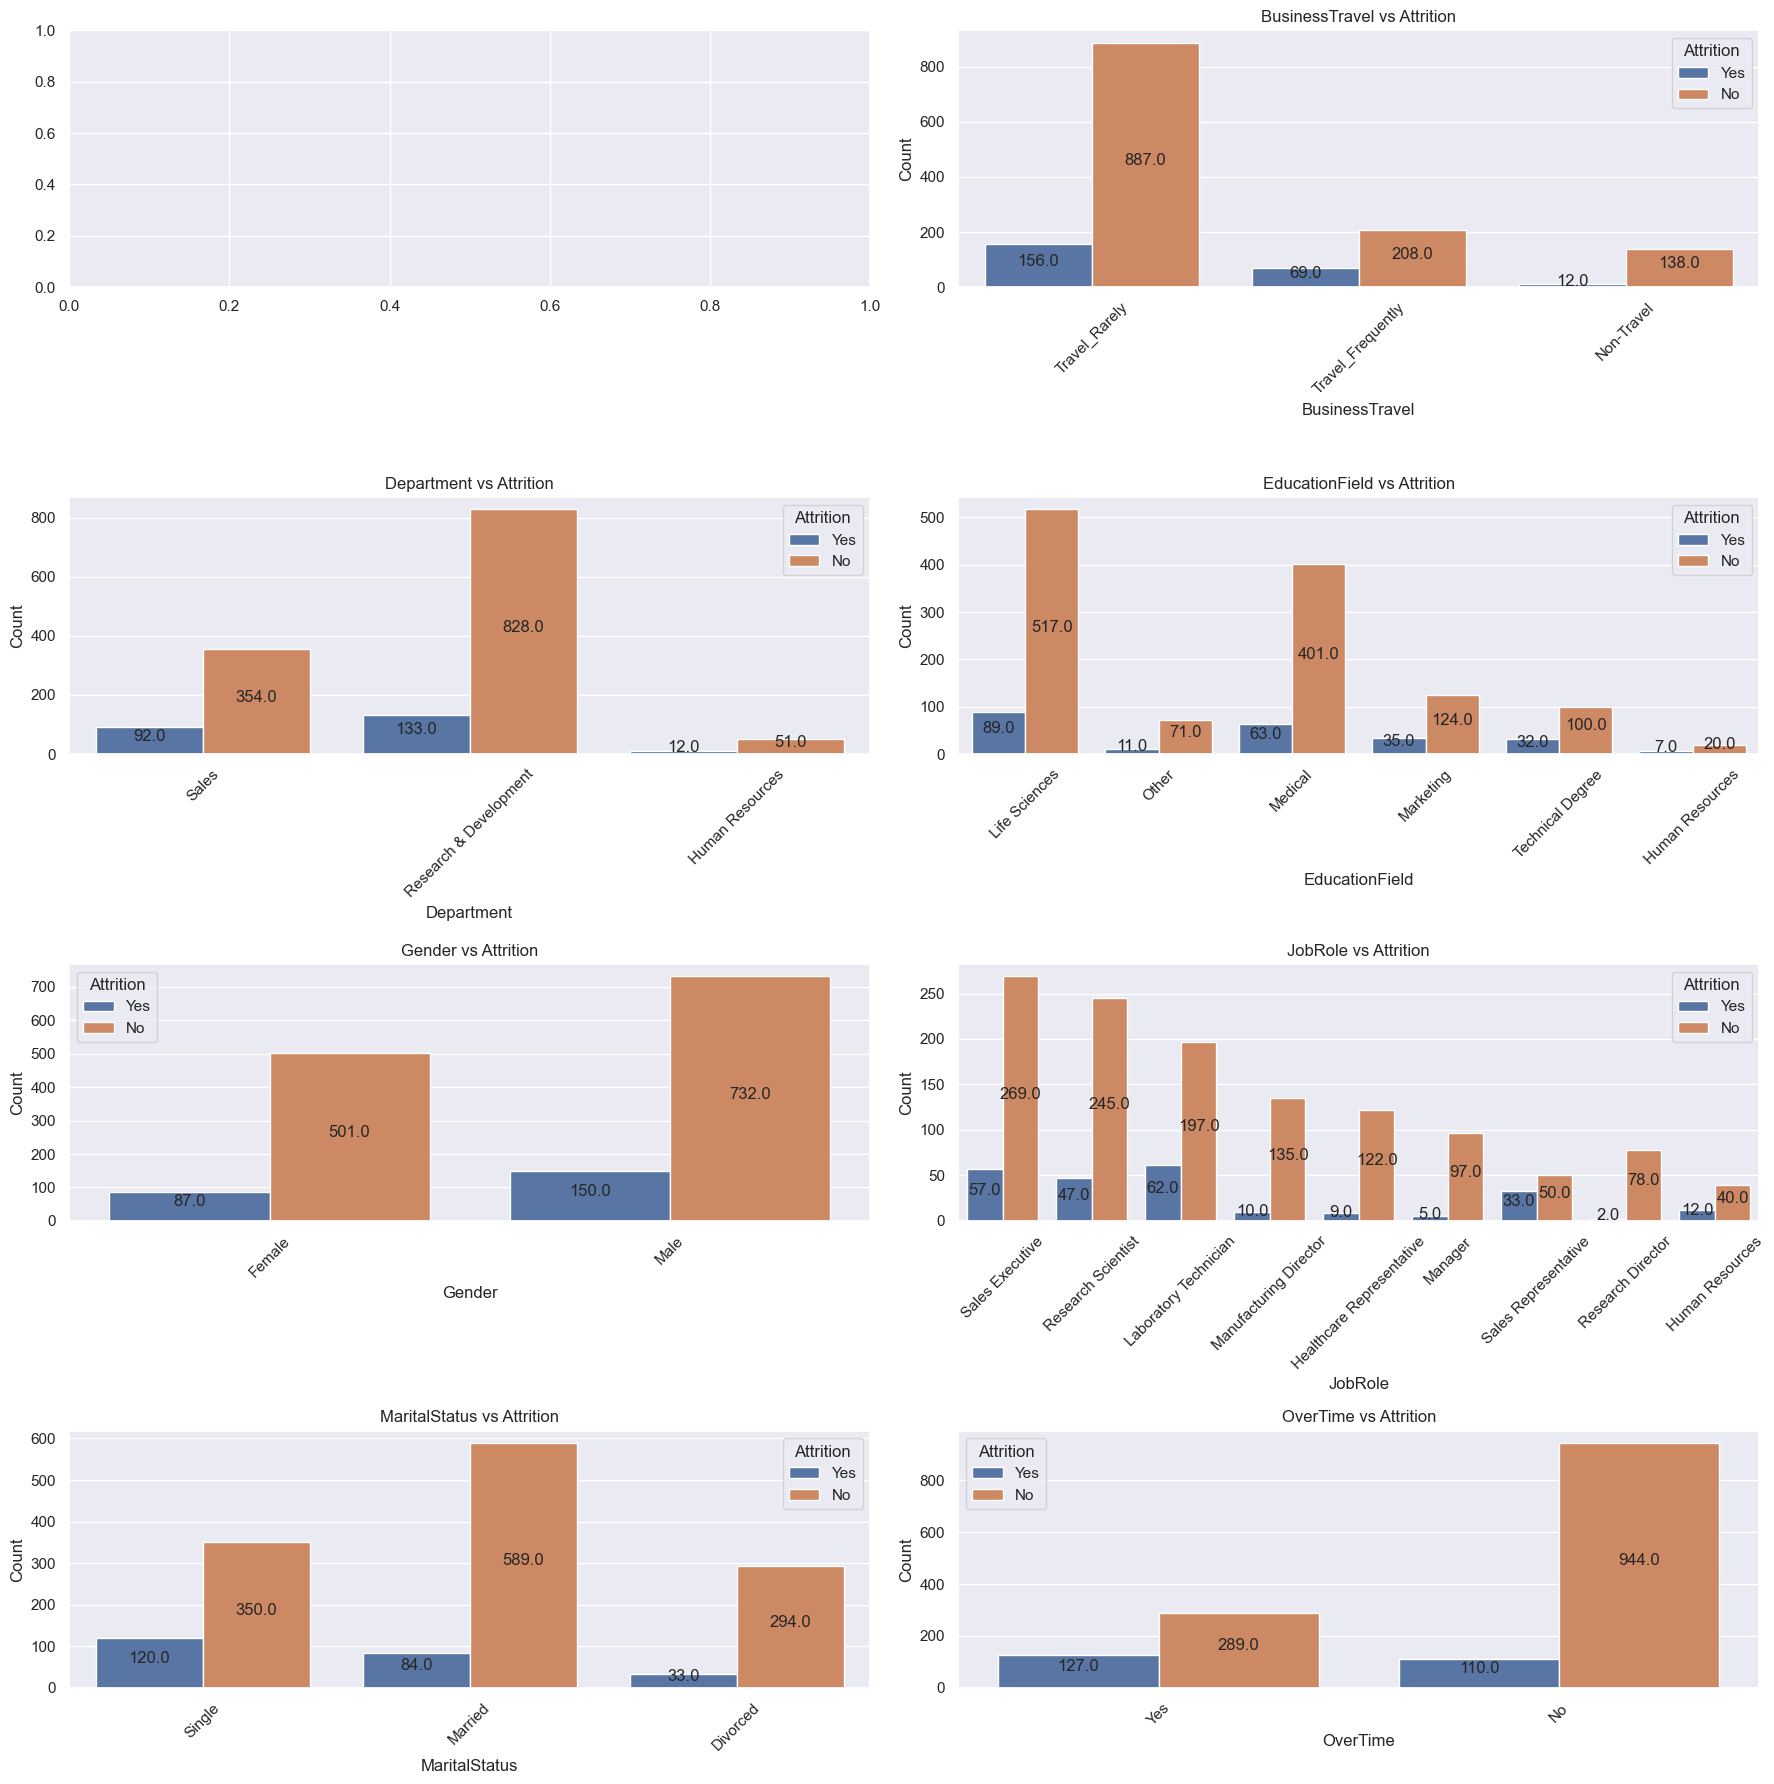

In [21]:
fig,ax=plt.subplots(nrows=4,ncols=2,figsize=(18,18))
for i,ax in zip(categorical_features,ax.flatten()):
    if i not in ['Attrition']:
        sns.countplot(data=attrition_data,x=i,hue="Attrition",ax=ax)
        ax.set_title(f'{i} vs Attrition')
        ax.set_xlabel(f'{i}',fontsize=12)
        ax.set_ylabel('Count',fontsize=12)
        ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
        for rect in ax.patches:
            ax.text(rect.get_x()+rect.get_width()/2,rect.get_height()/2,rect.get_height(),
                   ha='center')
plt.tight_layout()
plt.show()

The Attrition rate is observed to be highest in the employees working in Research & Development department and gender wise Male employees have more attrition rate when compared to Female employees and attrition rate amongst Single employees is more when compared to employees with Married and Divorced whereas OverTime doesnt have major impact on Attrition 

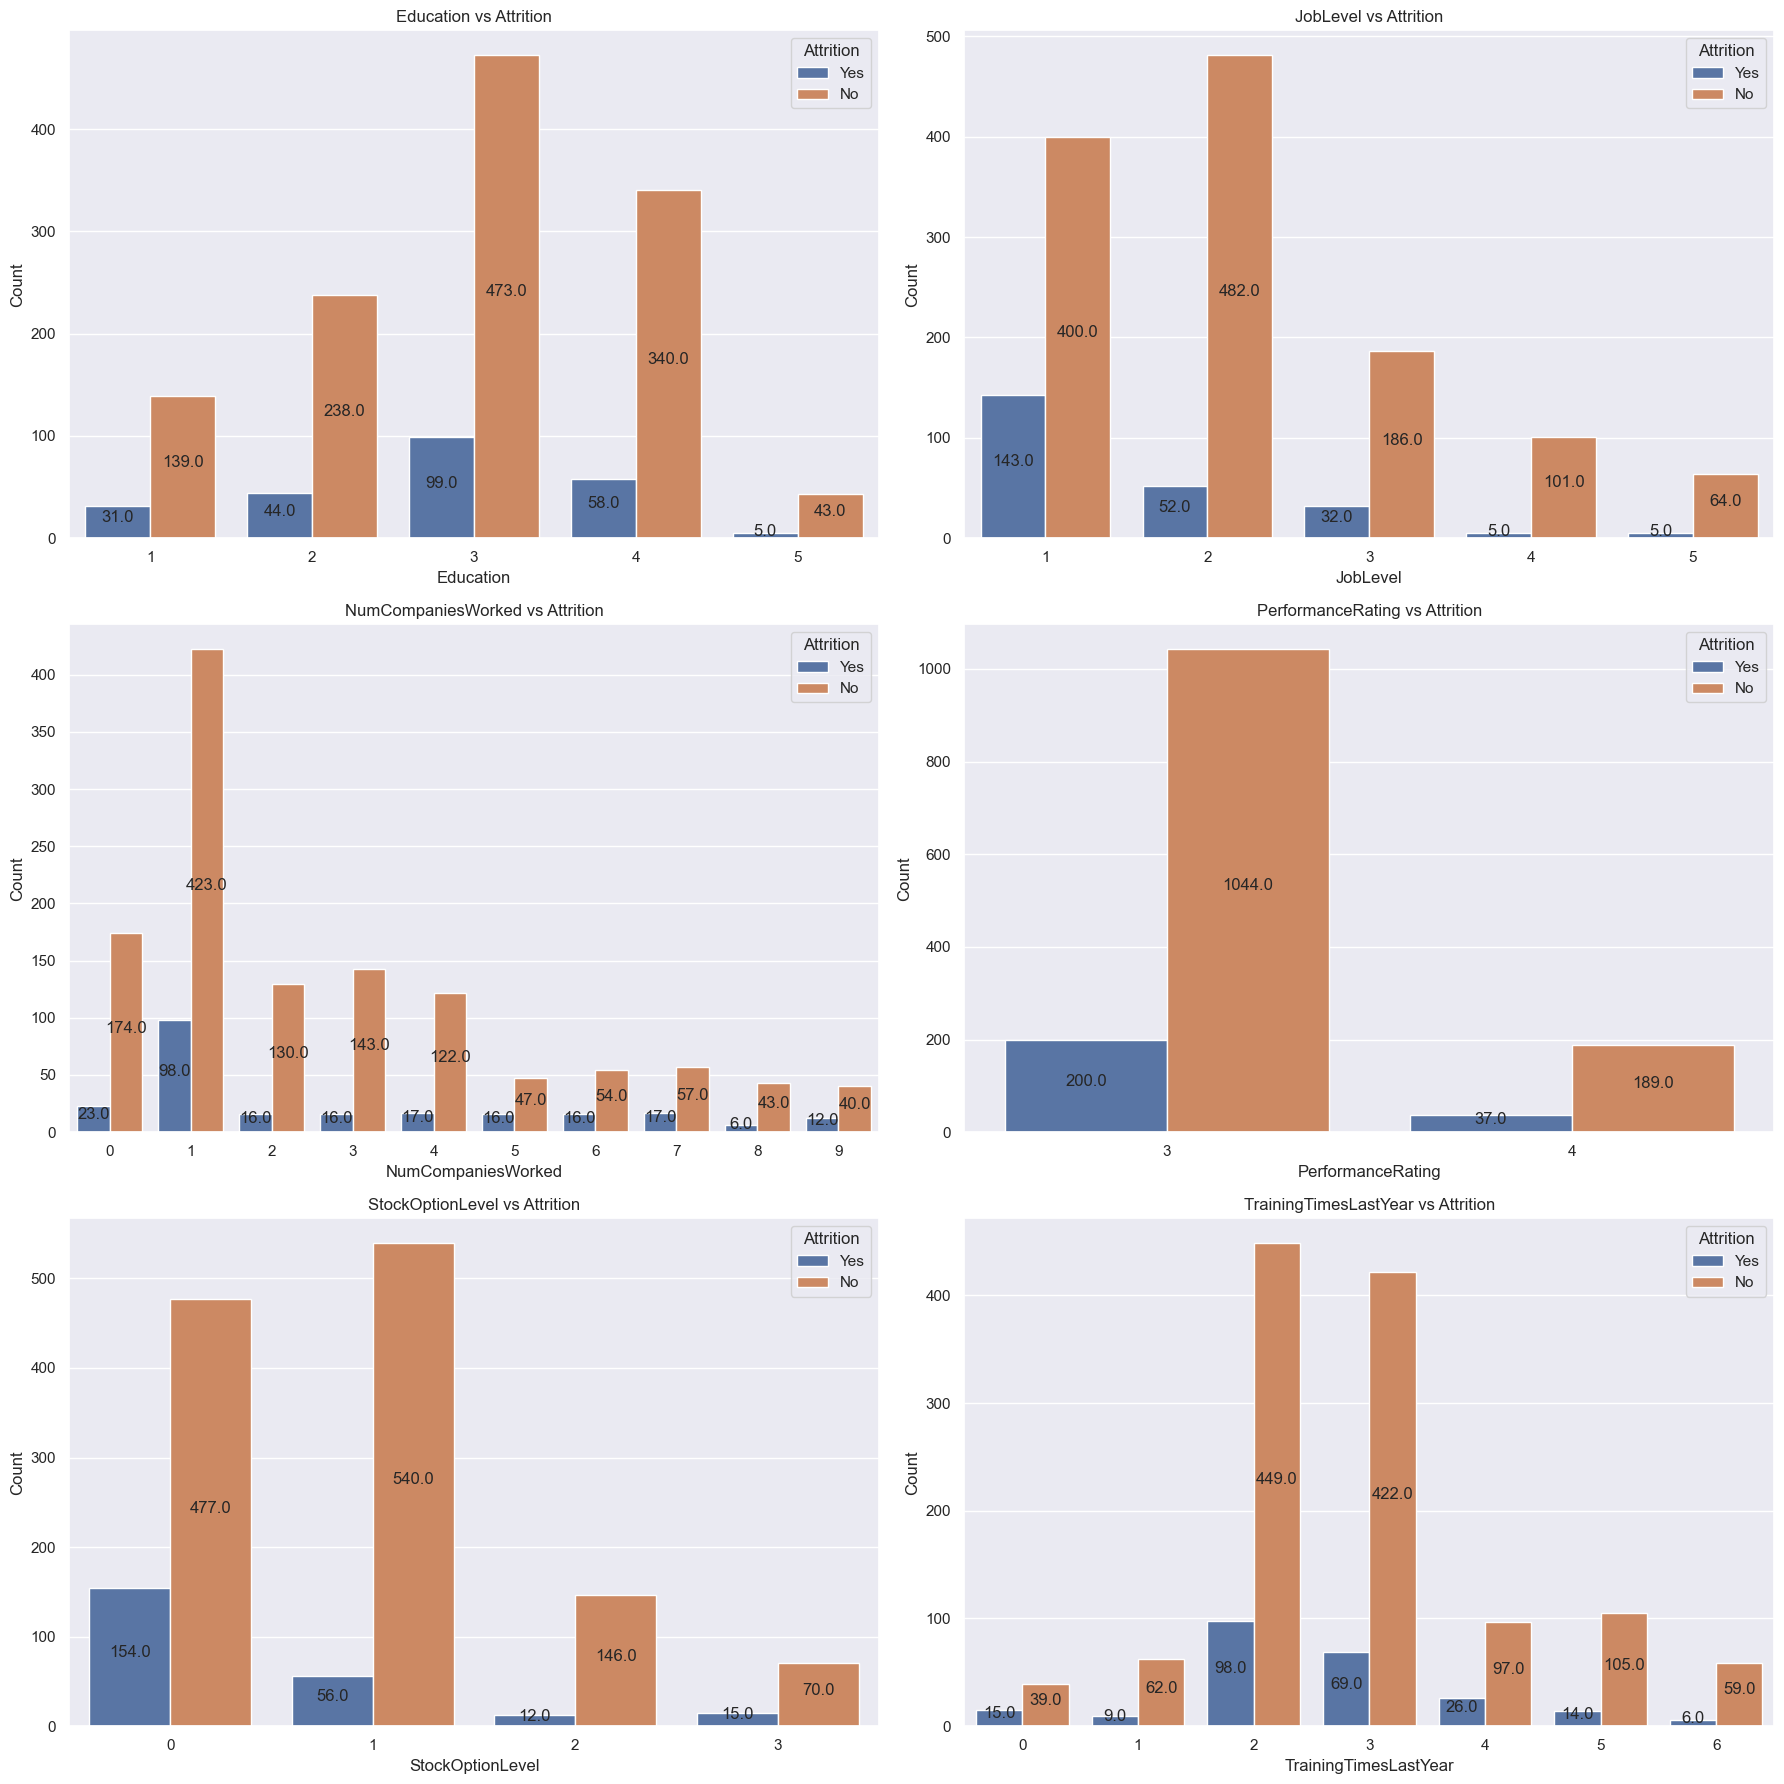

In [22]:
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(18,18))
for i,ax in zip(discrete_features,ax.flatten()):
        sns.countplot(data=attrition_data,x=i,hue="Attrition",ax=ax)
        ax.set_title(f'{i} vs Attrition')
        ax.set_xlabel(f'{i}',fontsize=12)
        ax.set_ylabel('Count',fontsize=12)
        ax.set_xticklabels(ax.get_xticklabels())
        for rect in ax.patches:
            ax.text(rect.get_x()+rect.get_width()/2,rect.get_height()/2,rect.get_height(),
                   ha='center')
plt.tight_layout()
plt.show()

* Employees at lower job level are most likely to quit job when compared to Employees working at higher job level
* Perfomance Rating do impact attrition rate employees who receive lower ratings most likely to search for opportunities elsewhere
* Employees who have worked in only 1-2 company before joining the organization are more likely to quit when compared to employees who have worked in more than 3+ companies before 

# Distribution of non categorical features in the data

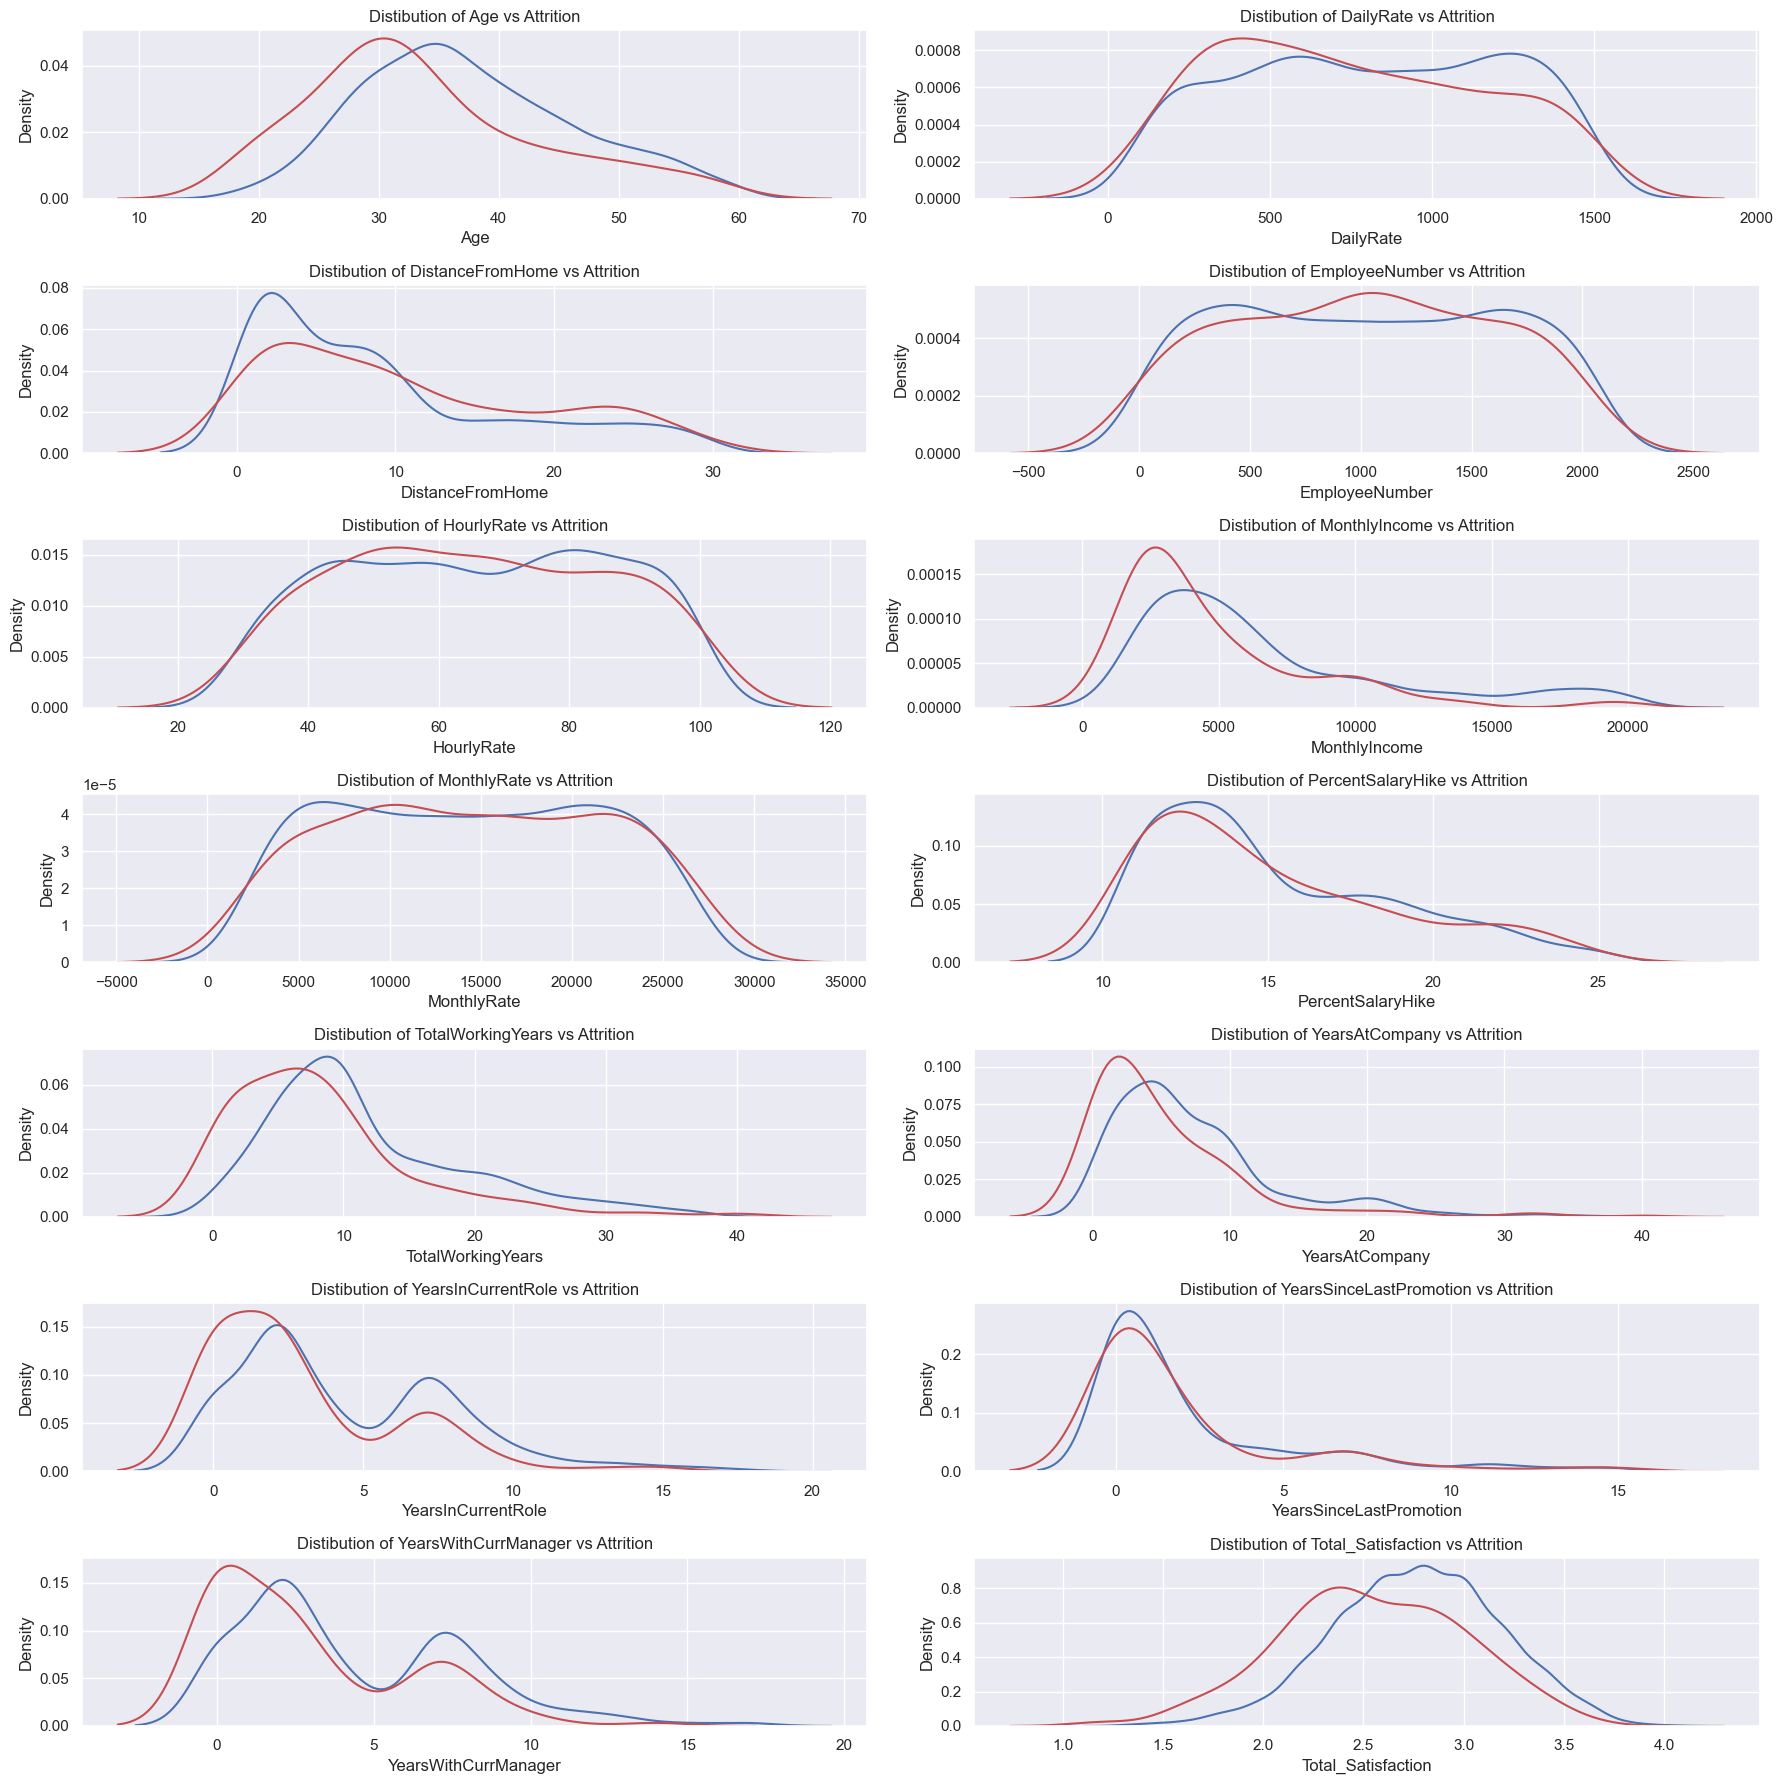

In [23]:
fig,ax=plt.subplots(nrows=7,ncols=2,figsize=(18,18))
for i,ax in zip(non_categorical_features,ax.flatten()):
        sns.distplot(attrition_data[attrition_data['Attrition']=='No'][i],hist=False,ax=ax,label='No')
        sns.distplot(attrition_data[attrition_data['Attrition']=='Yes'][i],hist=False,color='r',label='Yes',ax=ax)
        ax.set_title(f'Distibution of {i} vs Attrition')
        ax.set_xlabel(f'{i}',fontsize=12)
        ax.set_ylabel('Density',fontsize=12)
plt.tight_layout()
plt.show()

* Attrition rate is observed to be more in the age group of 20-40 when compared to the other age groups and it is even observed in the employees whose monthly income is less than 5000 and also in the employees who have received less percentage salary hike when compared to the employees who received better percentage salary hike 
* People who have less work experience tend to have higher attrition rate when compared to employees with 10+ years of work experience
* Attrition rate is less amongst the employees who are working in the same company for more than 10+ years .

# Label Encoding


In [24]:
le = LabelEncoder()
for col in categorical_features:
    attrition_data[col]=le.fit_transform(attrition_data[col])

In [25]:
attrition_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,Gender,HourlyRate,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Total_Satisfaction
0,41,1,2,1102,2,1,2,1,1,0,94,2,7,2,5993,19479,8,1,11,3,0,8,0,6,4,0,5,2.2
1,49,0,1,279,1,8,1,1,2,1,61,2,6,1,5130,24907,1,0,23,4,1,10,3,10,7,1,7,2.8
2,37,1,2,1373,1,2,2,4,4,1,92,1,2,2,2090,2396,6,1,15,3,0,7,3,0,0,0,0,2.8
3,33,0,1,1392,1,3,4,1,5,0,56,1,6,1,2909,23159,1,1,11,3,0,8,3,8,7,3,0,3.2
4,27,0,2,591,1,2,1,3,7,1,40,1,2,1,3468,16632,9,0,12,3,1,6,3,2,2,2,2,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,1,41,2,2,1,2571,12290,4,0,17,3,1,17,3,5,2,0,3,3.4
1466,39,0,2,613,1,6,1,3,2062,1,42,3,0,1,9991,21457,4,0,15,3,1,9,5,7,7,1,7,2.2
1467,27,0,2,155,1,4,3,1,2064,1,87,2,4,1,6142,5174,1,1,20,4,1,6,0,6,2,0,3,2.6
1468,49,0,1,1023,2,2,3,3,2065,1,63,2,7,1,5390,13243,2,0,14,3,0,17,3,9,6,0,8,2.8


In [26]:
attrition_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'Gender', 'HourlyRate', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Total_Satisfaction'],
      dtype='object')

In [27]:
scaler = StandardScaler()
for col in non_categorical_features:
    attrition_data[col]=scaler.fit_transform(attrition_data[[col]])

In [28]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,Gender,HourlyRate,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Total_Satisfaction
0,0.446350,1,2,0.742527,2,-1.010909,2,1,-1.701283,0,1.383138,2,7,2,-0.108350,0.726020,8,1,-1.150554,3,0,-0.421642,0,-0.164613,-0.063296,-0.679146,0.245834,-1.238894
1,1.322365,0,1,-1.297775,1,-0.147150,1,1,-1.699621,1,-0.240677,2,6,1,-0.291719,1.488876,1,0,2.129306,4,1,-0.164511,3,0.488508,0.764998,-0.368715,0.806541,0.161650
2,0.008343,1,2,1.414363,1,-0.887515,2,4,-1.696298,1,1.284725,1,2,2,-0.937654,-1.674841,6,1,-0.057267,3,0,-0.550208,3,-1.144294,-1.167687,-0.679146,-1.155935,0.161650
3,-0.429664,0,1,1.461466,1,-0.764121,4,1,-1.694636,0,-0.486709,1,6,1,-0.763634,1.243211,1,1,-1.150554,3,0,-0.421642,3,0.161947,0.764998,0.252146,-1.155935,1.095346
4,-1.086676,0,2,-0.524295,1,-0.887515,1,3,-1.691313,1,-1.274014,1,2,1,-0.644858,0.325900,9,0,-0.877232,3,1,-0.678774,3,-0.817734,-0.615492,-0.058285,-0.595227,-0.305198


# Correlation Matrix

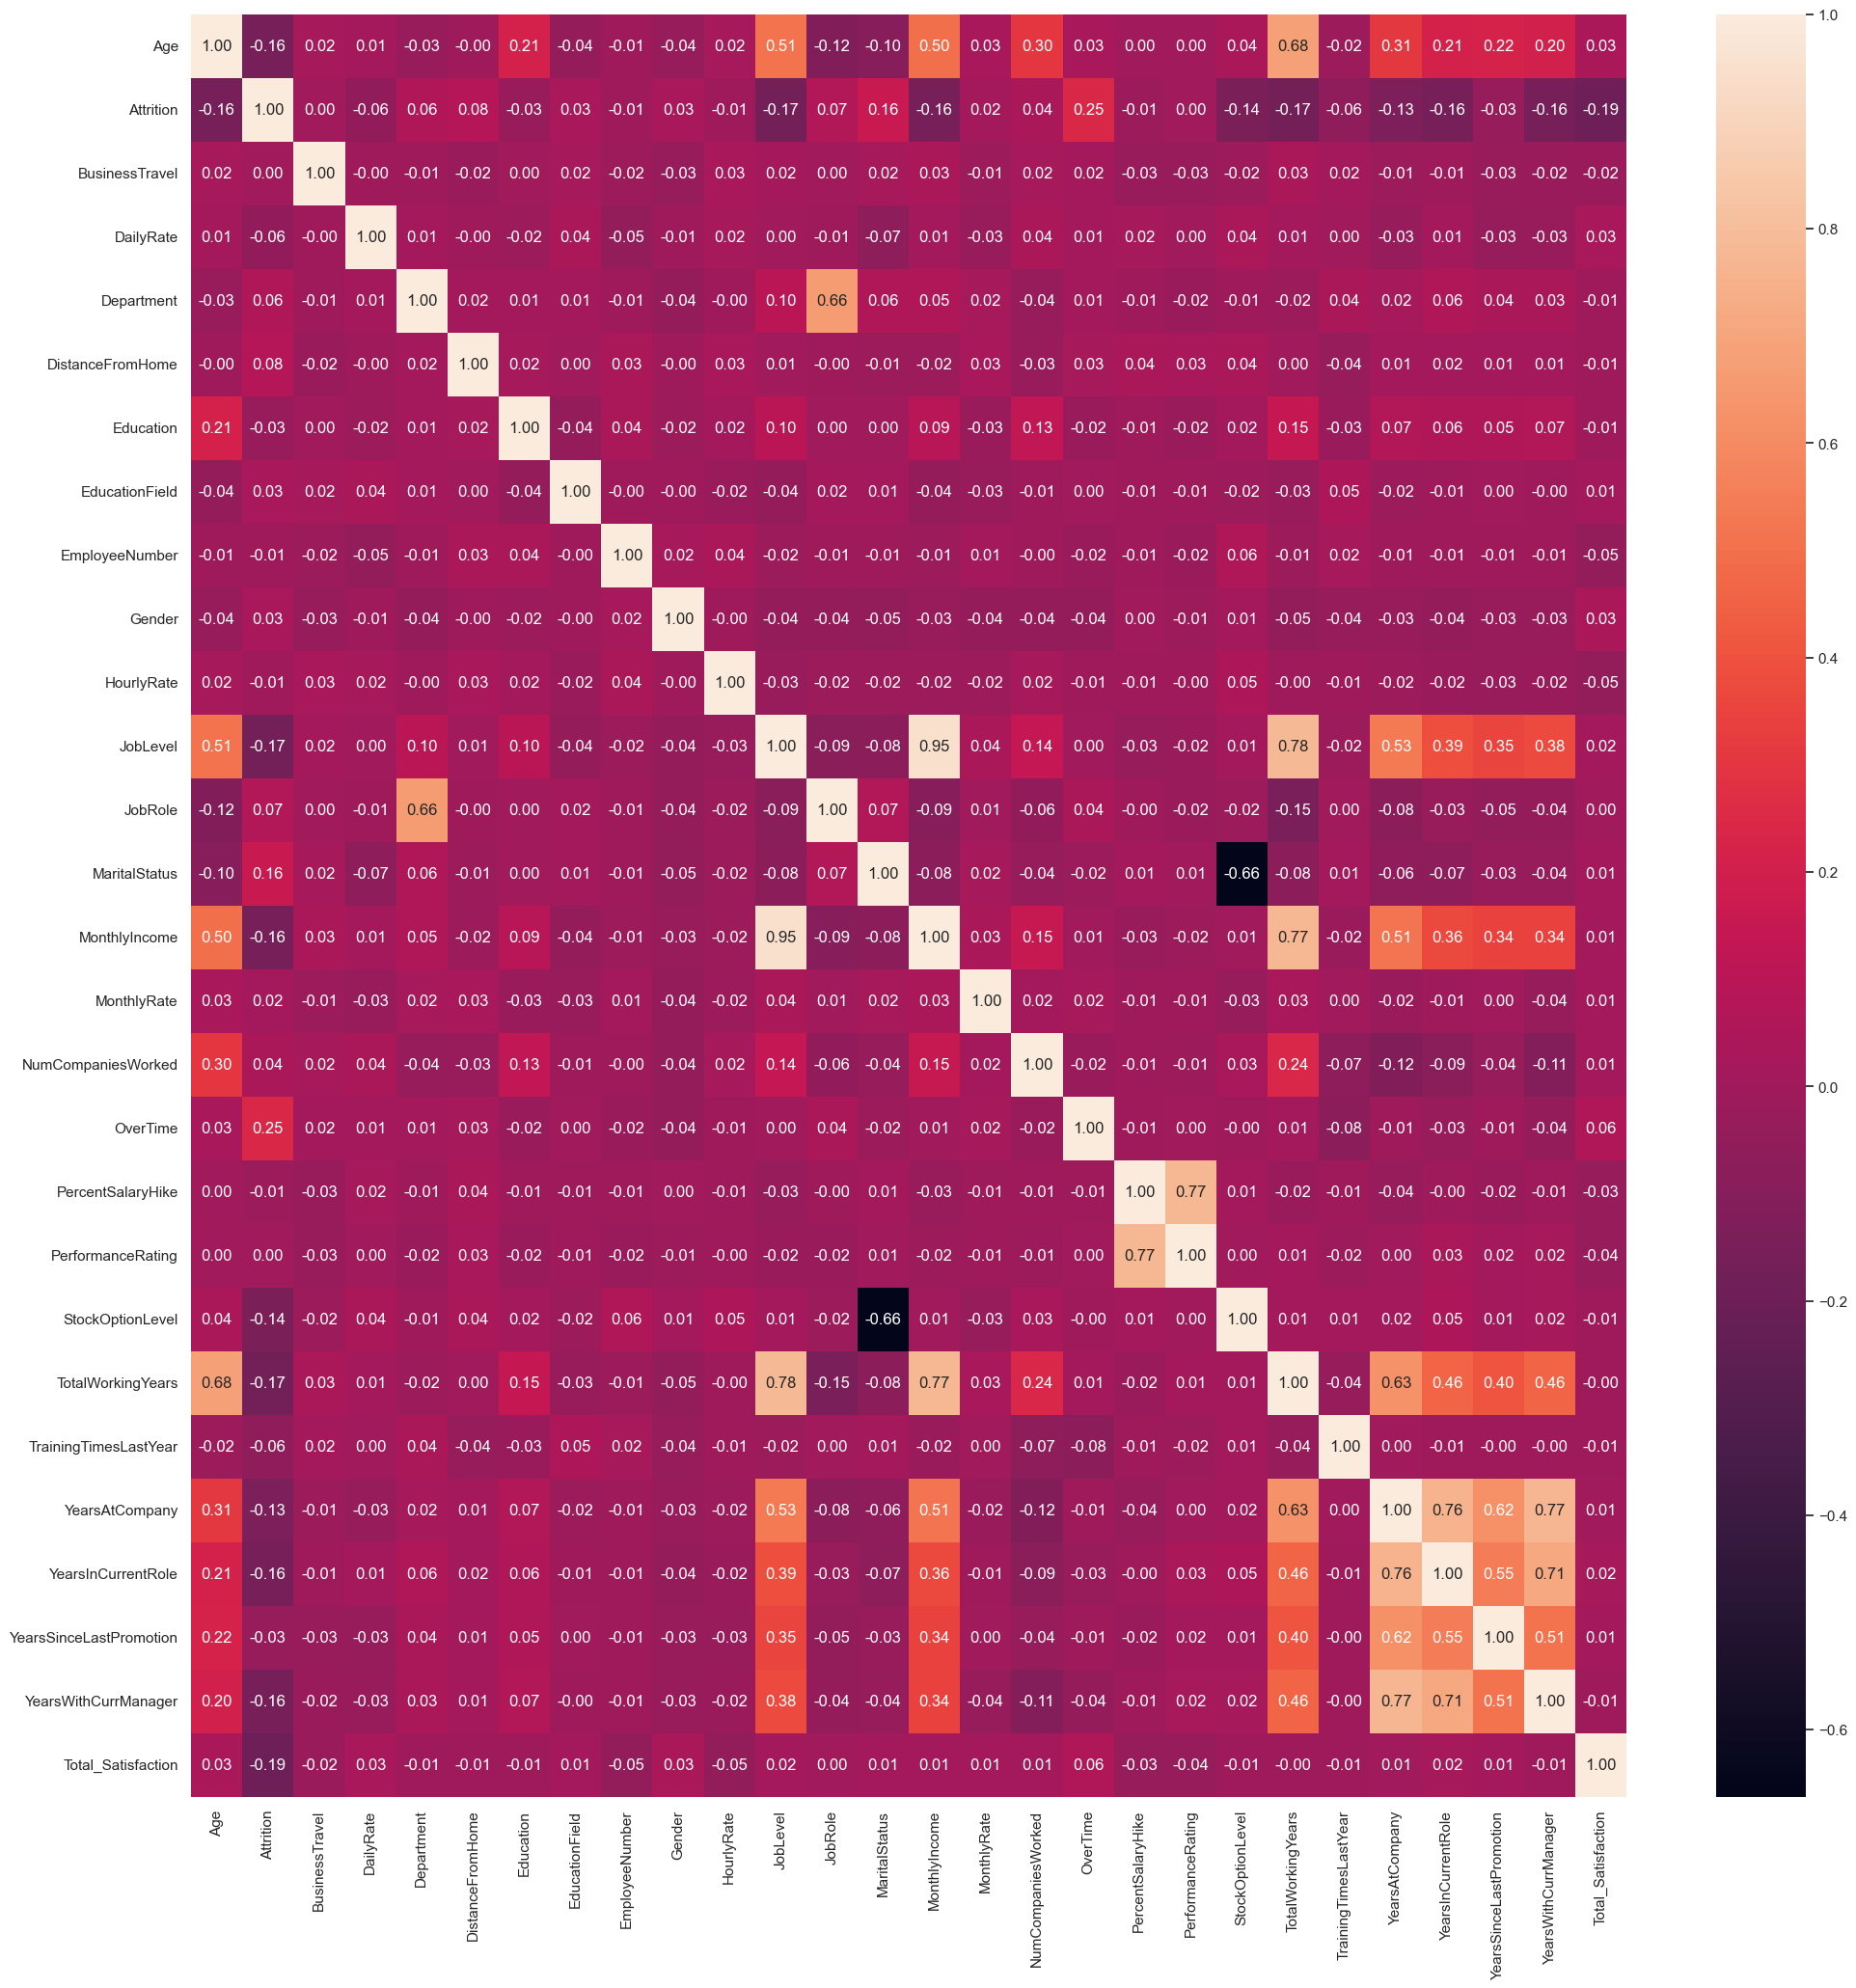

In [29]:
plt.figure(figsize=(24,24))
attrition_corr=attrition_data.corr()
sns.heatmap(data=attrition_corr,annot=True,fmt='.2f')
plt.show()

Age is highly correlated to JobLevel and Monthly income

Monthly income is strongly correlated to Joblevel and Total Working Years


# Train Test Split

In [30]:
X=attrition_data.drop(columns='Attrition',axis=1)
y=attrition_data['Attrition']

In [31]:
y.value_counts()/len(y)*100

0    83.877551
1    16.122449
Name: Attrition, dtype: float64

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

We have an imbalanced class in dataset for Attrition we can handle this data imbalance with the help of SMOTE

In [33]:
smote = SMOTE(random_state=42,k_neighbors=5,sampling_strategy=0.8)
X_train_resampled,y_train_resampled = smote.fit_resample(X_train,y_train)

In [64]:
X_train_resampled

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,Gender,HourlyRate,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Total_Satisfaction
0,-1.415181,2,-1.121758,1,1.456975,2,5,0.874240,1,-0.437503,1,2,0,-0.893883,-0.601108,0,0,-0.330589,3,3,-1.193036,3,-0.981014,-0.891589,-0.679146,-1.155935,-1.238894
1,-2.072192,0,-1.277942,1,-0.517332,2,1,-0.021377,1,0.349801,1,6,2,-1.158419,-0.115258,1,0,-0.057267,3,0,-1.450167,2,-1.144294,-1.167687,-0.679146,-1.155935,1.095346
2,-0.867672,2,1.101996,2,1.333581,2,2,-1.123037,1,-1.027981,2,7,0,0.090955,-0.503292,2,0,-0.330589,3,1,-0.164511,2,-0.654454,-0.615492,-0.679146,-0.595227,2.029043
3,0.227347,2,-0.769726,1,0.346427,3,3,1.045388,1,0.005356,2,4,1,-0.256660,-0.930396,4,0,1.582663,4,0,-0.550208,3,-0.327893,-0.063296,-0.368715,-1.155935,0.628498
4,-0.648668,2,-1.218443,1,1.333581,3,1,1.422577,1,1.137106,2,2,0,-0.489961,0.605857,1,0,-1.150554,3,1,-0.164511,2,0.488508,1.041095,-0.679146,-0.595227,-0.772046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,-2.049392,1,1.040238,2,-0.555872,3,2,-0.629424,0,0.050519,1,8,2,-0.979027,-0.674219,1,0,-0.359044,3,0,-1.423397,3,-1.110297,-1.110199,-0.679146,-1.097560,0.161650
1756,-1.918871,2,-0.865001,2,1.333478,1,1,-1.316737,0,-0.388131,1,8,2,-0.981576,1.718419,1,0,0.817270,3,0,-1.424443,1,-1.111625,-1.167687,-0.679146,-1.155935,1.095346
1757,-0.547052,1,1.481600,2,-1.010909,3,4,0.655574,1,1.188084,1,7,1,-0.694626,0.239261,3,0,-0.106068,3,0,-0.807339,3,-0.741912,-0.714083,-0.424141,-0.695339,0.795205
1758,-0.720145,1,-0.335592,2,0.517824,4,1,0.015999,1,0.330659,1,7,1,-0.497616,0.243227,1,0,0.288138,3,1,-0.919797,2,-0.981014,-1.167687,-0.679146,-1.155935,-0.934161


In [35]:
y_train_resampled.value_counts()

0    978
1    782
Name: Attrition, dtype: int64

# Model Building - Logistic Regression

In [39]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_resampled,y_train_resampled)
y_log_pred=lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test,y_log_pred)
print('Accuracy_score :',lr_accuracy)

Accuracy_score : 0.7857142857142857


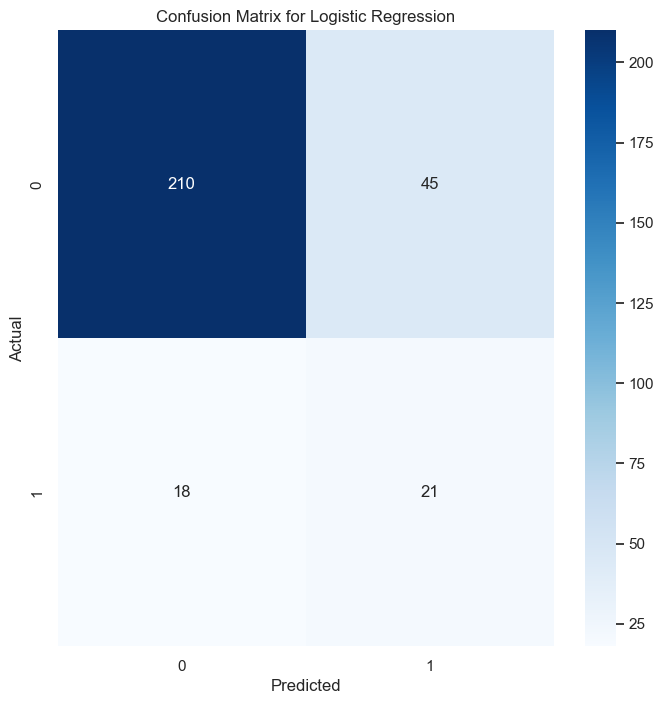

In [42]:
plt.figure(figsize=(8,8))
cm=confusion_matrix(y_test,y_log_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


In [43]:
print(classification_report(y_test,y_log_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       255
           1       0.32      0.54      0.40        39

    accuracy                           0.79       294
   macro avg       0.62      0.68      0.63       294
weighted avg       0.84      0.79      0.81       294



# Model 2 - Random Forest Classifier

In [44]:
rf_model = RandomForestClassifier()

In [45]:
param_dist={'max_depth':[2,3,4,5,8,10],
            'bootstrap':[True,False],
            'max_features':['auto','sqrt','log2',None],
            'criterion':['gini','entropy']
           }

In [48]:
cv_rf=GridSearchCV(rf_model,cv=10,param_grid=param_dist,n_jobs=3)
cv_rf.fit(X_train_resampled,y_train_resampled)
print('Best Parameters using Grid search: \n',cv_rf.best_params_)

Best Parameters using Grid search: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt'}


In [49]:
y_rfc_pred=cv_rf.predict(X_test)
training_accuracy = accuracy_score(y_test,y_rfc_pred)
print('Accuracy_score :',training_accuracy)

Accuracy_score : 0.8775510204081632


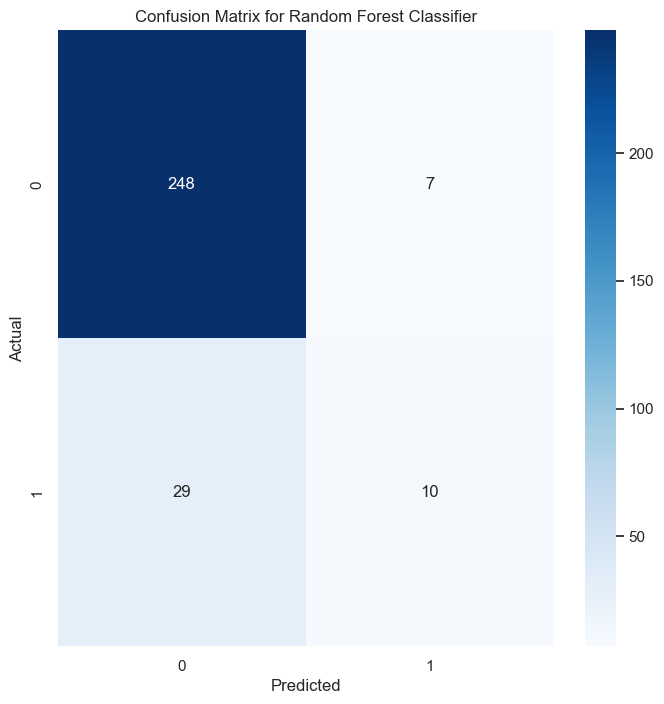

In [50]:
plt.figure(figsize=(8,8))
cm=confusion_matrix(y_test,y_rfc_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


In [59]:
print(classification_report(y_test,y_rfc_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       255
           1       0.59      0.26      0.36        39

    accuracy                           0.88       294
   macro avg       0.74      0.61      0.64       294
weighted avg       0.85      0.88      0.86       294



# Model 3 - XGBoost

In [51]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [52]:
xgb_model = XGBClassifier()
cv_xgb=GridSearchCV(xgb_model,param_grid,cv=10)
cv_xgb.fit(X_train_resampled,y_train_resampled)
cv_xgb_pred=cv_xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test,cv_xgb_pred)
print('Best Parameters using Grid search: \n',cv_xgb.best_params_)
print('Accuracy Score :',xgb_accuracy)

Best Parameters using Grid search: 
 {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}
Accuracy Score : 0.8605442176870748


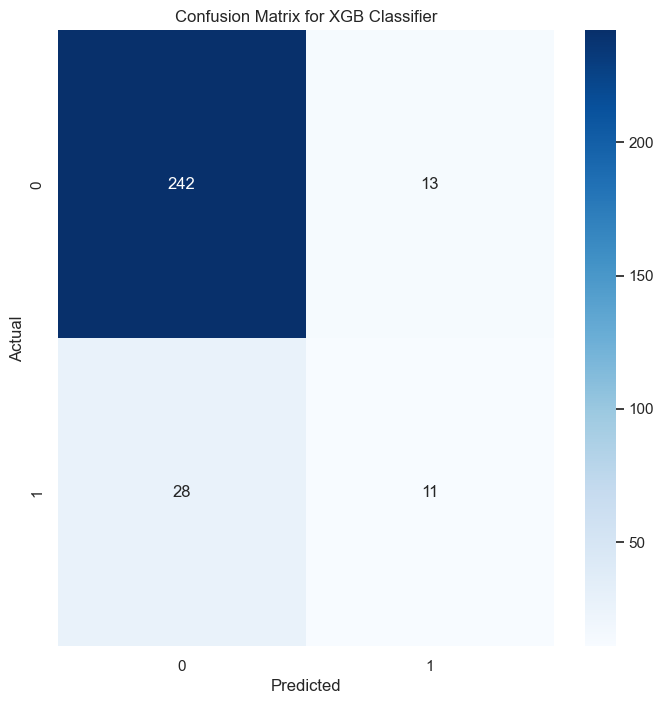

In [53]:
plt.figure(figsize=(8,8))
cm=confusion_matrix(y_test,cv_xgb_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGB Classifier')
plt.show()

In [60]:
print(classification_report(y_test,cv_xgb_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       255
           1       0.46      0.28      0.35        39

    accuracy                           0.86       294
   macro avg       0.68      0.62      0.64       294
weighted avg       0.84      0.86      0.85       294



# Model 4 - Support Vector Machine

In [57]:
svc = SVC(kernel='rbf')
svc.fit(X_train_resampled,y_train_resampled)
y_svc_pred = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,y_svc_pred)
print('Training accuracy :',svc_accuracy)


Training accuracy : 0.8231292517006803


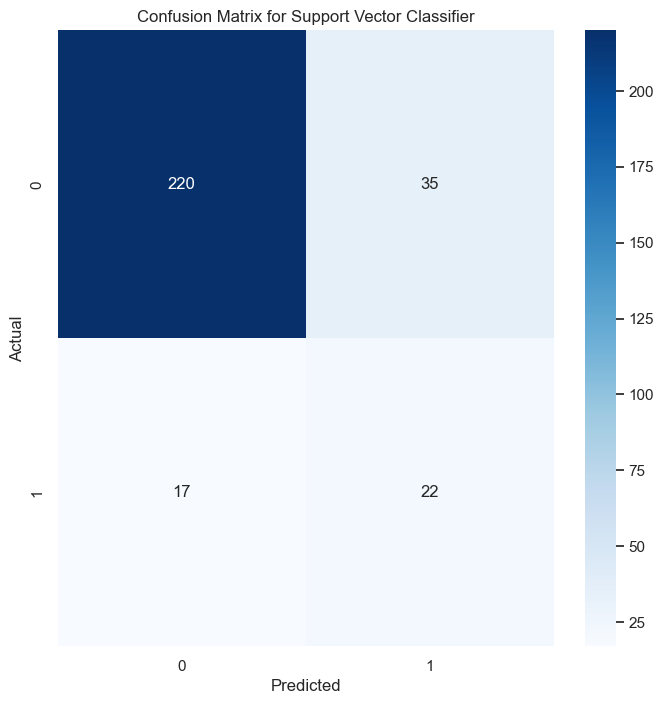

In [58]:
plt.figure(figsize=(8,8))
cm=confusion_matrix(y_test,y_svc_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

In [61]:
print(classification_report(y_test,y_svc_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       255
           1       0.39      0.56      0.46        39

    accuracy                           0.82       294
   macro avg       0.66      0.71      0.68       294
weighted avg       0.86      0.82      0.84       294



# Model 5 - KNN

In [68]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_resampled,y_train_resampled)
y_pred_knn=knn_model.predict(X_test)
knn_accuracy=accuracy_score(y_test,y_pred_knn)
print('Accuracy Score :',knn_accuracy)


Accuracy Score : 0.7006802721088435


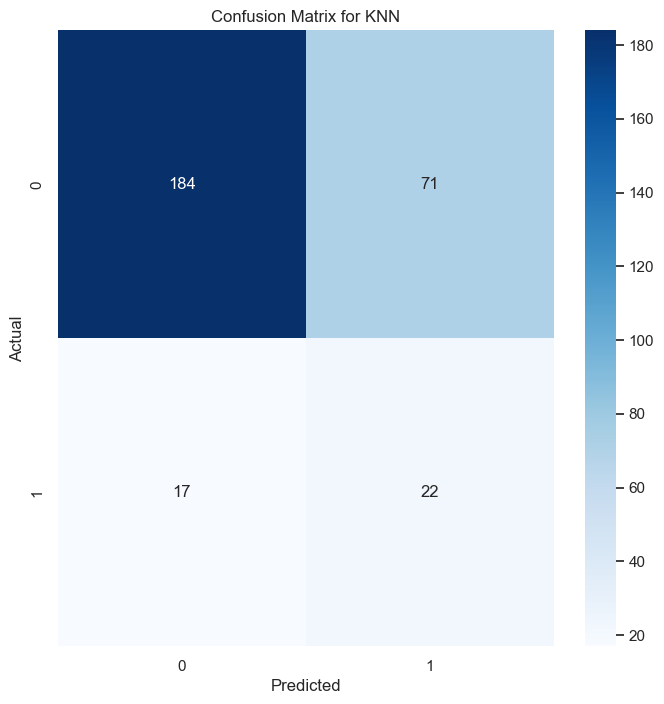

In [69]:
plt.figure(figsize=(8,8))
cm=confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()

In [76]:
results = pd.DataFrame({"Model" : ['Logistic Regression','Random Forest Classifier','XGBoost','Support Vector Machine','KNN'],
                       "Accuracy":[lr_accuracy,training_accuracy,xgb_accuracy,svc_accuracy,knn_accuracy]})
print(results)

                      Model  Accuracy
0       Logistic Regression  0.785714
1  Random Forest Classifier  0.877551
2                   XGBoost  0.860544
3    Support Vector Machine  0.823129
4                       KNN  0.700680


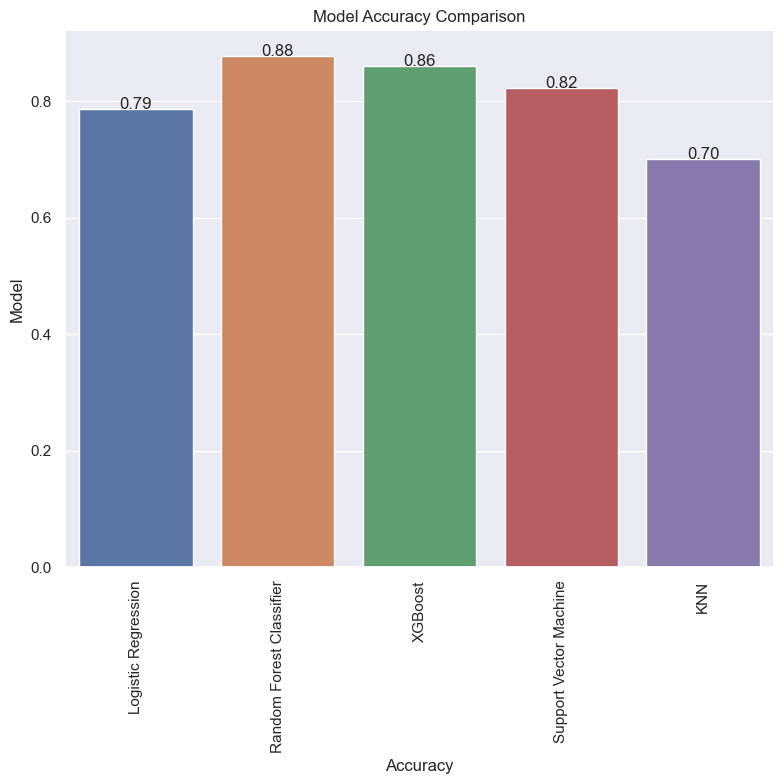

In [74]:
plt.figure(figsize=(8,8))
sns.barplot(x='Model',y='Accuracy',data=results)
for i in range(len(results)):
    plt.text(i,results['Accuracy'][i],f"{results['Accuracy'][i]:.2f}",ha='center')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

# Conclusion

We have used 5 ML models ie Logistic Regression , Random Forest Classifier , XGBoost , Support Vector Machine and KNN out of which Random Forest Classifier proved to provide the best accuracy score of 88% when compared to other models